In [1]:
import graphlab as gl

In [2]:
gl.product_key.get_product_key()

'88'

In [2]:
sales = gl.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv/')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1495303723.log
INFO:graphlab.cython.cy_server:GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1495303723.log


Finished parsing file /home/ubuntu/coursera-notebooks/course-2/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.018264 secs.

This non-commercial license of GraphLab Create for academic use is assigned to  and .
------------------------------------------------------

Read 99 lines. Lines per second: 6626.95

Finished parsing file /home/ubuntu/coursera-notebooks/course-2/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.017688 secs.


Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


In [5]:
sales.head(5)

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


In [6]:
sales[sales['County']==[]'Delaware']

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
77370,7.737,34.2,10.0,-1.2,Clifton,Delaware
40642,4.0642,45.7,15.0,0.0,Darby Bor.,Delaware
71359,7.1359,22.3,8.0,1.6,Darby Town,Delaware
74502,7.4502,21.4,15.0,-3.2,Follcroft,Delaware
97167,9.7167,29.3,10.0,0.2,Glenolden,Delaware
436348,43.6348,16.5,10.0,-0.7,Haverford,Delaware
130436,13.0436,31.2,17.0,-0.4,L Southampton,Delaware
93738,9.3738,19.3,7.0,-0.4,Lansdown,Delaware


In [6]:
gl.canvas.set_target('ipynb')

In [7]:
sales.show(view="Scatter Plot",x="CrimeRate",y="HousePrice")

Create a regression model using crime as a feature

In [8]:
crime_model = gl.linear_regression.create(sales,target="HousePrice",features=["CrimeRate"],validation_set=None,verbose=False)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

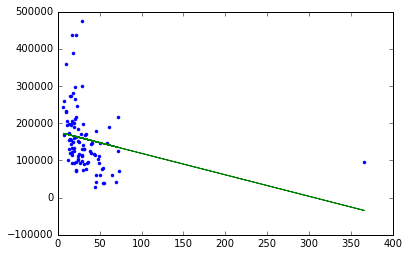

In [10]:
plt.plot(sales["CrimeRate"],sales["HousePrice"],'.',sales["CrimeRate"],crime_model.predict(sales),'-')

# Remove Center City and redo analysis

In [11]:
sales_noCC=sales[sales['MilesPhila']!=0.0]

In [12]:
sales_noCC.head(10)

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [14]:
sales_noCC[sales_noCC['MilesPhila']==0.0]

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County


In [15]:
sales_noCC.show(view="Scatter Plot",x="CrimeRate",y="HousePrice")

In [16]:
crime_model_noCC = gl.linear_regression.create(sales_noCC, target='HousePrice', features=['CrimeRate'],validation_set=None,verbose=False)

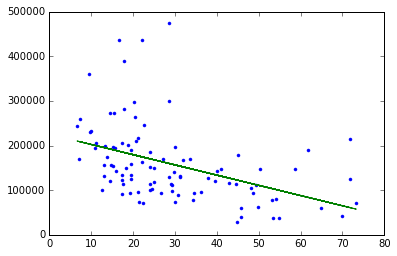

In [17]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',sales_noCC['CrimeRate'],crime_model_noCC.predict(sales_noCC),'-')

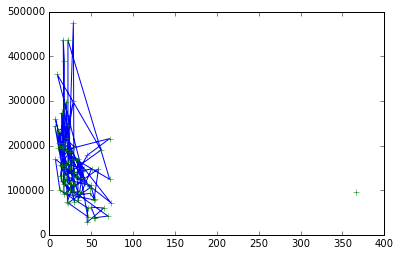

In [18]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'-',sales['CrimeRate'],sales['HousePrice'],'+')

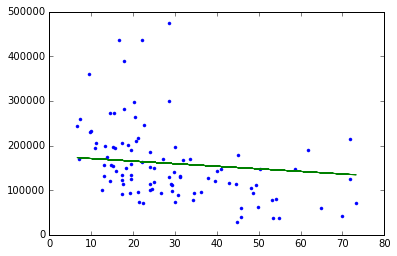

In [19]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',sales_noCC['CrimeRate'],crime_model.predict(sales_noCC),'-')

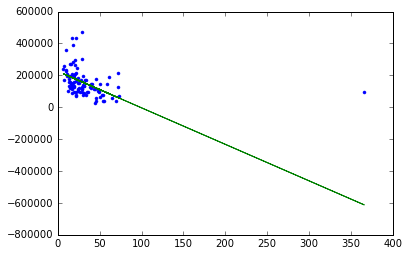

In [20]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',sales['CrimeRate'],crime_model_noCC.predict(sales),'-')

# Compare coefficients for full-data fit versus no-Center-City fit

In [22]:
crime_model.get('coefficients')

name,index,value,stderr
(intercept),None,176626.046881,11245.5882194
CrimeRate,None,-576.804949058,226.90225951


In [23]:
crime_model_noCC.get('coefficients')

name,index,value,stderr
(intercept),None,225204.604303,16404.0247514
CrimeRate,None,-2287.69717443,491.537478123


# High Leverage observations Vs Influential observations

In [27]:
sales_noCC[sales_noCC['HousePrice']<350000]

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [28]:
sales_nohighend=sales_noCC[sales_noCC['HousePrice']<350000]

In [29]:
sales_nohighend.head(5)

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


In [33]:
sales_nohighend[sales_nohighend['HousePrice']>350000]

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County


In [36]:
crime_model_nohighend=gl.linear_regression.create(sales_nohighend,target='HousePrice',features=['CrimeRate'],validation_set=None,verbose=False)

In [38]:
crime_model.get('coefficients')

name,index,value,stderr
(intercept),None,176626.046881,11245.5882194
CrimeRate,None,-576.804949058,226.90225951


In [39]:
crime_model_noCC.get('coefficients')

name,index,value,stderr
(intercept),None,225204.604303,16404.0247514
CrimeRate,None,-2287.69717443,491.537478123


In [40]:
crime_model_nohighend.get('coefficients')

name,index,value,stderr
(intercept),None,199073.589615,11932.5101105
CrimeRate,None,-1837.71280989,351.519609333


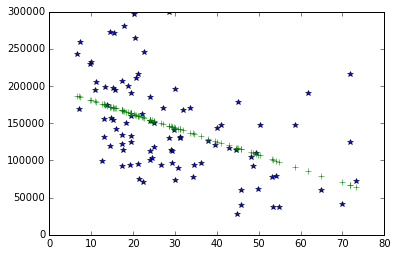

In [42]:
plt.plot(sales_nohighend['CrimeRate'],sales_nohighend['HousePrice'],'*',
        sales_nohighend['CrimeRate'],crime_model_nohighend.predict(sales_nohighend),'+')